In [3]:
# Try small data file first (only data science jobs)
import json
import os
data_folder = os.path.join(os.getcwd(), "job_data", "indeed_job_descs_data+scientist.json")
indeed = json.load(open(data_folder, "r"))

In [6]:
# Explore the loaded data
print("Data type: " + str(type(indeed)))
print("Key values: " + str(indeed.keys()))
jd_demo = indeed['job_descriptions'][0]
is_exist = "python" in jd_demo.lower()
print("Appearance of word 'python' in first doc: " + str(is_exist))
print("Number of docs: " + str(len(indeed['job_descriptions'])))

Data type<class 'dict'>
Key valuesdict_keys(['job_descriptions', 'request_params'])
Appearance of word 'python' in first doc:True
Number of docs:79


In [7]:
# Regular expression tool
import re
set(re.findall("^\w", indeed['job_descriptions'][0]))

{'A'}

In [13]:
# Find a word in doc
job_list = indeed['job_descriptions']
for index, string_with_R in enumerate(re.findall('.{20}python.{20}', job_list[3].lower())):
    print(''.join([str(index),': ', string_with_R]))

0: ing skills (such as python or scala), experien


In [14]:
# Manual counting words in all docs
from collections import defaultdict
import re
match_dict_1 = defaultdict(list)
count_word = [0, 0]
######## Method 1 ########
for job_description in indeed['job_descriptions']:
    # Match R
    list_match = re.findall(".{0,20}[ ,\n(.]R[ ,\n).].{0,20}", job_description)
    if len(list_match) > 0:
        count_word[0] = count_word[0] + 1
        match_dict_1['R'].append(list_match)
        
    # Match Python
    list_match = re.findall(".{0,20}[ ,\n(.]python[ ,\n).].{0,20}", job_description.lower())
    if len(list_match) > 0:
        count_word[1] = count_word[1] + 1   
        match_dict_1['Python'].append(list_match)
        
print("####### Method 1 #######")        
print(''.join(["Mention of R: ", str(count_word[0])]))        
print(''.join(["Mention of Python: ", str(count_word[1])]))        

######## Method 2 ########
match_dict_2 = defaultdict(list)
count_word = [0, 0]
for job_description in indeed['job_descriptions']:
    # Match R
    list_match = re.findall(".{0,20}[^\w]R[^\w].{0,20}", job_description)
    if len(list_match) > 0:
        count_word[0] = count_word[0] + 1
        match_dict_2['R'].append(list_match)
        
    # Match Python
    list_match = re.findall(".{0,20}[^\w]python[^\w].{0,20}", job_description.lower())
    if len(list_match) > 0:
        count_word[1] = count_word[1] + 1 
        match_dict_2['Python'].append(list_match)
        
print('\n')        
print("####### Method 2 #######")        
print(''.join(["Mention of R: ", str(count_word[0])]))        
print(''.join(["Mention of Python: ", str(count_word[1])]))        

####### Method 1 #######
Mention of R: 45
Mention of Python: 61


####### Method 2 #######
Mention of R: 46
Mention of Python: 61


In [15]:
# Check the found matched words in all docs
for match_str in match_dict_1['Python']:
    print(match_str)

['s of experience with python programming language']
['gramming in r and/or python.', 've knowledge in r or python data analysis.']
['ding skills (such as python or scala), experienc']
[' other tools such as python or ryou have a stron']
['good command of r or python and their popular pa']
['oducts using sql, r, python, oracle, redshift an']
[' athena, databricks, python, r, mode analytics, ']
['ce as a programmer - python, perl, java, and/or ']
['knowledge of python, r, matlab & other m']
[' other tools such as python or ryou have a stron']
['ormation package (r, python, alteryx)', 'g, web analytics and python scripting']
[' analysis using r or python (numpy, scipy, matpl']
['ence (2+ years) with python or rability to effec']
['well versed in python or r (and willingnes', 'ontinue to learn the python ecosystem)']
['opment experience in python experience and or fa']
['software, e.g., r or python\nexperience working w']
['tools for analysis - python (with pandas, etc.),']
[' are profici

In [17]:
# Use NLP library
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\57luu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
# Import library to split docs into tokens (word in this case)
from nltk.tokenize import word_tokenize

# Try on one example
test_doc = indeed['job_descriptions'][2]
test_doc_tokenized = word_tokenize(test_doc)
print("Whole doc: ")
print(test_doc[:150])
print("")
print("Tokenized doc: ")
print(test_doc_tokenized[:30])

Whole doc: 
ABOUT HOPPER

At Hopper, we’re on a mission to make booking travel faster, easier, and more transparent. We are leveraging the power that comes from c

Tokenized doc: 
['ABOUT', 'HOPPER', 'At', 'Hopper', ',', 'we', '’', 're', 'on', 'a', 'mission', 'to', 'make', 'booking', 'travel', 'faster', ',', 'easier', ',', 'and', 'more', 'transparent', '.', 'We', 'are', 'leveraging', 'the', 'power', 'that', 'comes']


In [26]:
# Check if some word exist in token list
print(sum('bit.ly' in token for token in test_doc_tokenized))


1


In [27]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
# Stemmer (get back original words by removing ending characters)
stemmer = PorterStemmer()
print("Developed: " + stemmer.stem("Developed"))


Developed: develop


In [29]:
# Lemmatizer  (get back original words)
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
print("were: " + lemmatizer.lemmatize("were", pos="v"))

were: be


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\57luu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
# Compare word count before and after stemming
from collections import Counter
tokens = word_tokenize(test_doc)
stemmed_tokens = [stemmer.stem(token) for token in tokens]
count_after_stem = len(Counter(stemmed_tokens))
count_before_stem = len(set(tokens))
print("Word count before stemming: " + str(count_before_stem))
print("Word count after stemming: " + str(count_after_stem))


Word count before stemming: 335
Word count after stemming: 303


In [32]:
# Remove stop words (e.g. the, is, etc.)
from nltk.corpus import stopwords
nltk.download('stopwords')
en_sw = set(stopwords.words('english'))
tokens = word_tokenize(test_doc.lower())
stemmed_tokens = [stemmer.stem(token)
                  for token in tokens
                  if token not in en_sw]
token_cnt = Counter(stemmed_tokens)
print("Word count after stemming + stopwords: " + str(len(token_cnt)))


Word count after stemming + stopwords: 255


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\57luu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
# Manual extract bag of words with stemming and stopword
import json
from collections import Counter

import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

# Count the words
en_sw = set(stopwords.words('english'))
stemmer = PorterStemmer()
tok_cnts = []
for jd in indeed["job_descriptions"]:
    tokens = word_tokenize(jd.lower())    
    tokens = [stemmer.stem(token) for token in tokens if token not in en_sw]
    tok_cnts.append(Counter(tokens))

# Convert to panda data type    
freq_panda = pd.DataFrame(tok_cnts)
freq_mat = freq_panda.values

In [34]:
# Get some info
print(freq_panda.info())
freq_panda.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Columns: 3205 entries, ! to ﬁnding
dtypes: float64(3205)
memory usage: 1.9 MB
None


,!,#,$,%,&,','','d,'ll,'re,...,·,–,—,’,“,”,…,ﬁeld,ﬁnd,ﬁnding
0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Replace nan values
freq_panda.fillna(value=0, inplace=True)
freq_panda.head(3)

,!,#,$,%,&,','','d,'ll,'re,...,·,–,—,’,“,”,…,ﬁeld,ﬁnd,ﬁnding
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# Built-in from sklearn (no stop word, no stemming)
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
bow_skl = vectorizer.fit_transform(indeed['job_descriptions'])

tokens_skl = vectorizer.get_feature_names()
freq_skl = bow_skl.toarray()

In [37]:
# Check the result of built-in function (does not match 4169 vs. 3205)
freq_skl.shape

(79, 4169)

In [38]:
# Add stop word, tokenizer and stemming to the built-in
vectorizer = CountVectorizer(stop_words=en_sw, tokenizer=word_tokenize)
analyzer = vectorizer.build_analyzer()

def stem_analyzer(doc):
    return [stemmer.stem(w) for w in analyzer(doc)]

stem_vectorizer = CountVectorizer(analyzer=stem_analyzer)
bow_skl = stem_vectorizer.fit_transform(indeed["job_descriptions"])
freq_skl = bow_skl.toarray()
feature_name = stem_vectorizer.get_feature_names()

C:\Users\57luu\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [39]:
# Check if the two are the same now
import numpy as np
np.nansum(np.abs((freq_mat - freq_skl)))

0.0

In [40]:
#### Manual computation of TF-IDF
bow = freq_panda
tf = bow.values
N = bow.shape[0]
idf_df = bow.apply(lambda x: pd.np.log(N / (1 + sum(x > 0))), axis=0)

# Manipulate the shape for broadcasting
idf = idf_df.values.reshape((1, -1))
tfidf_manual = pd.DataFrame(tf * idf, columns=bow.columns)

In [41]:
#### Built-in sklearn computation of TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(analyzer=stem_analyzer)
tfidf_skl = tfidf_vectorizer.fit_transform(indeed['job_descriptions'])
tfidf_sklearn = tfidf_skl.toarray()
tokens = tfidf_vectorizer.get_feature_names()

In [206]:
# Check any difference (YES)
np.nansum(np.abs((tfidf_manual.values - tfidf_sklearn)))

39548.529000140916

In [136]:
tfidf_manual.values[0, :10]

array([1.53623451, 1.8845412 , 2.06686276,        nan,        nan,
              nan,        nan,        nan,        nan,        nan])

In [138]:
tfidf_sklearn[0, :10]

array([0.02575363, 0.02927297, 0.03111518, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [207]:
#### Manual computation of TF-IDF (modified to match sklearn)
bow = freq_panda
tf = bow.values
N = bow.shape[0]
idf_df = bow.apply(lambda x: pd.np.log((1 + N) / (1 + sum(x > 0))) + 1, axis=0)

# Manipulate the shape for broadcasting
idf = idf_df.values.reshape((1, -1))
tfidf_manual_new = pd.DataFrame(tf * idf, columns=bow.columns)
tfidf_manual_new.fillna(value=0, inplace=True )


In [208]:
tfidf_manual_new = tfidf_manual_new.apply(lambda x: x / pd.np.sqrt(sum(x**2)), axis=1)
tfidf_manual_new.head(3)

,!,#,$,%,&,','','d,'ll,'re,...,·,–,—,’,“,”,…,ﬁeld,ﬁnd,ﬁnding
0,0.025754,0.029273,0.031115,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.066740,0.056302,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.018902,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.072651,0.076611,0.0,0.0,0.0,0.0,0.0,0.0
2,0.063256,0.000000,0.038212,0.044551,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.086431,0.0,0.0,0.0,0.0,0.0,0.0


In [209]:
np.nansum(np.abs((tfidf_manual_new.values - tfidf_sklearn)))

3.0014185581350716e-13

In [240]:
# Check the top words using tf-idf
import numpy as np
word_name = tokens
word_tfidf = np.sum(tfidf_sklearn, axis=0)
index_sort = np.argsort(word_tfidf)
top_word = [word_name[ind] for ind in index_sort[-30:]]
print(top_word)

['build', 'engin', 'knowledg', 'analysi', 'skill', 'year', 'scienc', 'develop', 'compani', ';', 'machin', 'use', 'requir', 'analyt', 'product', 'statist', 'model', 'team', '’', 'busi', 'learn', '--', 'work', ')', '(', 'experi', ':', 'data', '.', ',']


In [241]:
# Check the top words using frequency
import numpy as np
word_name = list(freq_panda)
word_count = np.sum(freq_mat, axis=0)
index_sort = np.argsort(word_count)
top_word = [word_name[ind] for ind in index_sort[-30:]]
print(top_word)

['scientist', 'machin', 'help', 'commun', 'year', ';', 'requir', 'skill', 'new', 'compani', 'develop', 'use', 'scienc', '--', 'analyt', 'model', 'product', 'statist', '’', 'learn', 'team', 'busi', ')', '(', 'work', 'experi', ':', 'data', '.', ',']


In [242]:
################################################## Try larger dataset ##################################################
data_folder = os.path.join(os.getcwd(), "data", "job_descriptions", "indeed_jds_by_doc.json")
indeed = json.load(open(data_folder, "r"))

In [243]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(analyzer=stem_analyzer)
tfidf_skl = tfidf_vectorizer.fit_transform(indeed['job_descriptions'])
tokens = tfidf_vectorizer.get_feature_names()

In [245]:
tfidf_norm = pd.DataFrame(tfidf_skl.toarray(), columns=tokens)
avg_tfidf = tfidf_norm.apply(pd.np.mean, 0)

In [250]:
# Select the top terms
top_terms = avg_tfidf.sort_values(ascending=False)[:200].index
top_tfidf = tfidf_norm[top_terms]
top_terms[:50]

Index([',', '.', ':', 'data', 'work', 'experi', ')', '(', 'manag', 'team',
       'product', 'develop', 'design', '’', 'busi', 'requir', '--', 'engin',
       ';', 'year', 'skill', 'new', 'includ', 'project', 'compani', 'test',
       'commun', 'build', 'applic', 'market', 'servic', 'client', 'support',
       'process', 'system', 'abil', 'program', 'use', 'research', 'sale', '$',
       'provid', 'job', '&', 'help', 'respons', 'custom', 'opportun', 'prefer',
       'candid'],
      dtype='object')

In [255]:
# Cluster using t-SNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

red_tfidf = TSNE(n_components=2).fit_transform(top_tfidf)


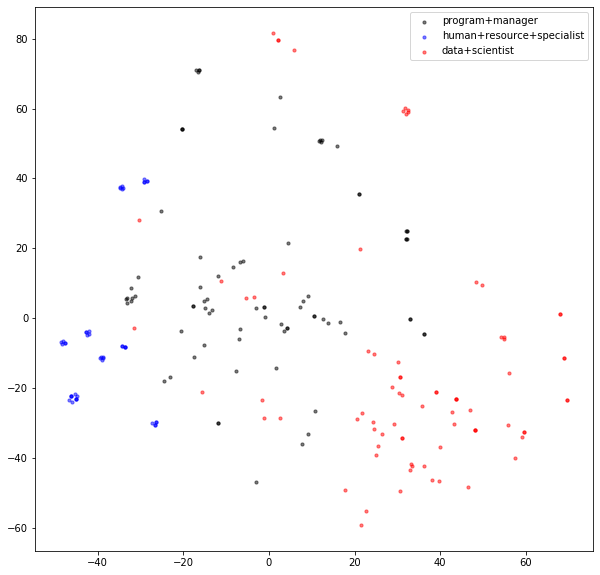

In [263]:
# Visualization
colors = ['red', 'blue', 'black']
subplots = []
titles = []
job_titles = ['program+manager', 'human+resource+specialist', 'data+scientist']
plt.figure(figsize = (10, 10))
for title in job_titles:
    subset = [label == title for label in indeed['labels']]
    subplots.append(
      plt.scatter(red_tfidf[subset, 0],
                  red_tfidf[subset, 1],
                  color=colors.pop(),
                  s=10, alpha=0.5))
    titles.append(title)
    plt.legend([subplot for subplot in subplots],
               titles)

# Save the different methods into different plots
plt.show()


In [256]:
# List of jobs
set(indeed['labels'])

{'business+analyst',
 'data+analyst',
 'data+architect',
 'data+engineer',
 'data+science+manager',
 'data+scientist',
 'engineering+manager',
 'frontend+developer',
 'fullstack+engineer',
 'human+resource+specialist',
 'machine+learning+engineer',
 'marketing',
 'office+manager',
 'product+designer',
 'product+manager',
 'program+manager',
 'recruiter',
 'research',
 'sales',
 'scientist',
 'site+reliability+engineer',
 'software+developer',
 'statistician',
 'talent+management',
 'technician',
 'test+engineer',
 'ux+designer'}